# Instagram Data Visualization
- 다양한 방법으로 시각화

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 한글 깨짐
plt.rc('font', family='NanumGothic')
plt.rcParams['font.size'] = 12

## 데이터 불러오기

In [2]:
df = pd.read_csv('./data/koreagram_2021_2022_final.csv', encoding='cp949')
df.head()

,content,place_final,place,place_content,대상여부,date,year,month,like,tags,카카오위치명,경도,위도,count
0,by travelaashley Nighttime tours to one of Se...,Gyeongbokgung,Gyeongbokgung,NaN,2,2022-09-01,2022,9,0,"['#seoulbyme', '#jongno.??', '#korea_attractio...",경복궁,126.976897,37.577609,47.0
1,Just a few more pics of Gyeongbokgung Palace i...,경복궁 - Gyeongbokgung Palace,경복궁 - Gyeongbokgung Palace,NaN,2,2022-08-09,2022,8,78,"['#korealife', '#korealandscape', '#koreatrip'...",경복궁,126.976897,37.577609,47.0
2,I never got to explore all the grounds at Gyeo...,경복궁 - Gyeongbokgung Palace,경복궁 - Gyeongbokgung Palace,NaN,2,2022-08-08,2022,8,84,"['#korealife', '#korealandscape', '#koreatrip'...",경복궁,126.976897,37.577609,47.0
3,Love the palaces in Seoul #gyeongbokgung #potd...,경복궁,경복궁,NaN,2,2022-07-26,2022,7,0,"['#gyeongbokgung', '#potd', '#seoul', '#koreab...",경복궁,126.976897,37.577609,47.0
4,I was going to tell a time traveling joke but...,경복궁,경복궁,NaN,2,2022-07-24,2022,7,0,"['#경복궁', '#seoul', '#gyeonbokgungpalace', '#po...",경복궁,126.976897,37.577609,47.0


In [3]:
# 대상여부 2인 것들만 추출
df_2 = df[df['대상여부'] == 2]
df_2.head()

,content,place_final,place,place_content,대상여부,date,year,month,like,tags,카카오위치명,경도,위도,count
0,by travelaashley Nighttime tours to one of Se...,Gyeongbokgung,Gyeongbokgung,NaN,2,2022-09-01,2022,9,0,"['#seoulbyme', '#jongno.??', '#korea_attractio...",경복궁,126.976897,37.577609,47.0
1,Just a few more pics of Gyeongbokgung Palace i...,경복궁 - Gyeongbokgung Palace,경복궁 - Gyeongbokgung Palace,NaN,2,2022-08-09,2022,8,78,"['#korealife', '#korealandscape', '#koreatrip'...",경복궁,126.976897,37.577609,47.0
2,I never got to explore all the grounds at Gyeo...,경복궁 - Gyeongbokgung Palace,경복궁 - Gyeongbokgung Palace,NaN,2,2022-08-08,2022,8,84,"['#korealife', '#korealandscape', '#koreatrip'...",경복궁,126.976897,37.577609,47.0
3,Love the palaces in Seoul #gyeongbokgung #potd...,경복궁,경복궁,NaN,2,2022-07-26,2022,7,0,"['#gyeongbokgung', '#potd', '#seoul', '#koreab...",경복궁,126.976897,37.577609,47.0
4,I was going to tell a time traveling joke but...,경복궁,경복궁,NaN,2,2022-07-24,2022,7,0,"['#경복궁', '#seoul', '#gyeonbokgungpalace', '#po...",경복궁,126.976897,37.577609,47.0


In [4]:
df_2.dtypes

content           object
place_final       object
place             object
place_content     object
대상여부               int64
date              object
year               int64
month              int64
like              object
tags              object
카카오위치명            object
경도               float64
위도               float64
count            float64
dtype: object

## 언급량 10건 이상

In [5]:
# count 컬럼 int형 변환
df_2 = df_2.astype({'count': int})
df_2.head()

,content,place_final,place,place_content,대상여부,date,year,month,like,tags,카카오위치명,경도,위도,count
0,by travelaashley Nighttime tours to one of Se...,Gyeongbokgung,Gyeongbokgung,NaN,2,2022-09-01,2022,9,0,"['#seoulbyme', '#jongno.??', '#korea_attractio...",경복궁,126.976897,37.577609,47
1,Just a few more pics of Gyeongbokgung Palace i...,경복궁 - Gyeongbokgung Palace,경복궁 - Gyeongbokgung Palace,NaN,2,2022-08-09,2022,8,78,"['#korealife', '#korealandscape', '#koreatrip'...",경복궁,126.976897,37.577609,47
2,I never got to explore all the grounds at Gyeo...,경복궁 - Gyeongbokgung Palace,경복궁 - Gyeongbokgung Palace,NaN,2,2022-08-08,2022,8,84,"['#korealife', '#korealandscape', '#koreatrip'...",경복궁,126.976897,37.577609,47
3,Love the palaces in Seoul #gyeongbokgung #potd...,경복궁,경복궁,NaN,2,2022-07-26,2022,7,0,"['#gyeongbokgung', '#potd', '#seoul', '#koreab...",경복궁,126.976897,37.577609,47
4,I was going to tell a time traveling joke but...,경복궁,경복궁,NaN,2,2022-07-24,2022,7,0,"['#경복궁', '#seoul', '#gyeonbokgungpalace', '#po...",경복궁,126.976897,37.577609,47


In [6]:
# count 순 정렬
df_2= df_2.sort_values(by='count', ascending=False)
df_2

,content,place_final,place,place_content,대상여부,date,year,month,like,tags,카카오위치명,경도,위도,count
0,by travelaashley Nighttime tours to one of Se...,Gyeongbokgung,Gyeongbokgung,NaN,2,2022-09-01,2022,9,0,"['#seoulbyme', '#jongno.??', '#korea_attractio...",경복궁,126.976897,37.577609,47
24,My Love for Ginko is endless #autumn #gyeongbo...,경복궁,경복궁,NaN,2,2021-11-04,2021,11,44,"['#autumn', '#gyeongbokgung', '#gyeongbokgungp...",경복궁,126.976897,37.577609,47
26,The traditional part of South Korea that you s...,경복궁,NaN,경복궁,2,2021-09-24,2021,9,259,"['#kbeauty', '#koreagram', '#korea', '#koreans...",경복궁,126.976897,37.577609,47
27,Gyeongbokgung PalaceWe found a little shop whe...,경복궁,서울,경복궁,2,2021-09-23,2021,9,72,"['#gyeongbokgungpalace', '#seoul', '#hanbok', ...",경복궁,126.976897,37.577609,47
28,Happy Monday Just your reminder to listen t...,경복궁,경복궁,NaN,2,2021-07-26,2021,7,0,[],경복궁,126.976897,37.577609,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1796,Moon Lovers' corner Hello queens Someone in th...,위양못,위양못,NaN,2,2021-06-12,2021,6,484,"['#anarangko', '#anarang', '#MoonLovers', '#kd...",위양못주차장,128.717367,35.546628,1
1797,23 10 21 17 12pm,위봉산성,위봉산성,NaN,2,2022-04-05,2022,4,35,[],위봉산성,127.252208,35.905272,1
1798,by l o v e so Asia s largest wave pool ...,웨이브파크,웨이브파크,NaN,2,2021-07-27,2021,7,0,"['#gyunggido', '#siheung.??', '#korea_attracti...",웨이브파크,126.680686,37.324100,1
1799,Happy Happy in a way that I didn t even reali...,웨스틴조선 서울,웨스틴조선 서울,NaN,2,2022-03-27,2022,3,84,"['#staycation', '#hotelstay', '#koreatravel', ...",웨스틴조선 서울,126.980056,37.564469,1


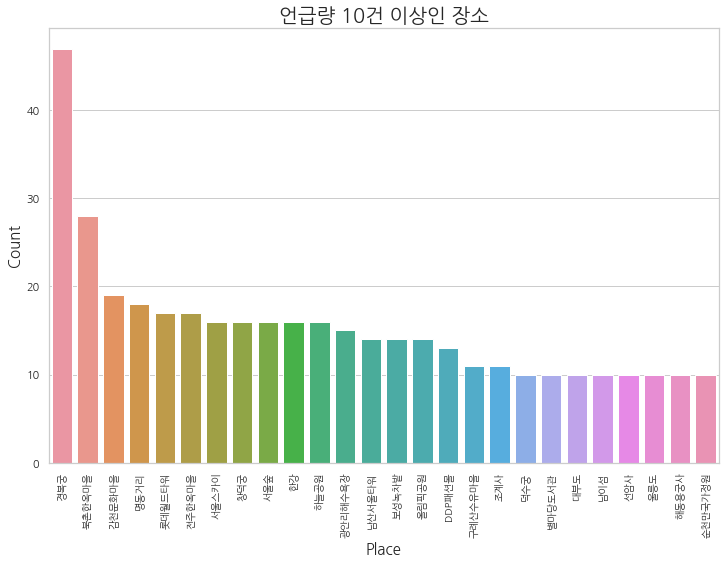

In [55]:
# count 10건 이상
plt.figure(figsize=(12, 8))
plt.rc('font', family='NanumGothic')
plt.title('언급량 10건 이상인 장소', fontsize=20)

df_2_count_10 = df_2[df_2['count'] >= 10]
sns.set_style('whitegrid')
sns.barplot(data=df_2_count_10, x='카카오위치명', y='count')

plt.xlabel('Place', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(fontsize=10, rotation=90)
plt.show()

## 워드클라우드

In [8]:
# 카카오위치명 컬럼 list로 변환
place = df_2['카카오위치명'].to_list()
place

['경복궁',
 '경복궁',
 '경복궁',
 '경복궁',
 '경복궁',
 '경복궁',
 '경복궁',
 '경복궁',
 '경복궁',
 '경복궁',
 '경복궁',
 '경복궁',
 '경복궁',
 '경복궁',
 '경복궁',
 '경복궁',
 '경복궁',
 '경복궁',
 '경복궁',
 '경복궁',
 '경복궁',
 '경복궁',
 '경복궁',
 '경복궁',
 '경복궁',
 '경복궁',
 '경복궁',
 '경복궁',
 '경복궁',
 '경복궁',
 '경복궁',
 '경복궁',
 '경복궁',
 '경복궁',
 '경복궁',
 '경복궁',
 '경복궁',
 '경복궁',
 '경복궁',
 '경복궁',
 '경복궁',
 '경복궁',
 '경복궁',
 '경복궁',
 '경복궁',
 '경복궁',
 '경복궁',
 '북촌한옥마을',
 '북촌한옥마을',
 '북촌한옥마을',
 '북촌한옥마을',
 '북촌한옥마을',
 '북촌한옥마을',
 '북촌한옥마을',
 '북촌한옥마을',
 '북촌한옥마을',
 '북촌한옥마을',
 '북촌한옥마을',
 '북촌한옥마을',
 '북촌한옥마을',
 '북촌한옥마을',
 '북촌한옥마을',
 '북촌한옥마을',
 '북촌한옥마을',
 '북촌한옥마을',
 '북촌한옥마을',
 '북촌한옥마을',
 '북촌한옥마을',
 '북촌한옥마을',
 '북촌한옥마을',
 '북촌한옥마을',
 '북촌한옥마을',
 '북촌한옥마을',
 '북촌한옥마을',
 '북촌한옥마을',
 '감천문화마을',
 '감천문화마을',
 '감천문화마을',
 '감천문화마을',
 '감천문화마을',
 '감천문화마을',
 '감천문화마을',
 '감천문화마을',
 '감천문화마을',
 '감천문화마을',
 '감천문화마을',
 '감천문화마을',
 '감천문화마을',
 '감천문화마을',
 '감천문화마을',
 '감천문화마을',
 '감천문화마을',
 '감천문화마을',
 '감천문화마을',
 '명동거리',
 '명동거리',
 '명동거리',
 '명동거리',
 '명동거리',
 '명동거리',
 '명동거리',
 '명동거리',
 '명동거리',
 '명동거리',
 '명동거리',
 '명동거리',

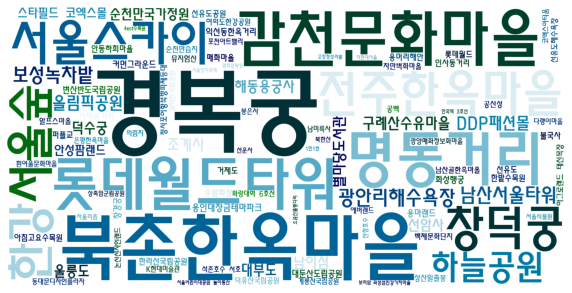

In [33]:
from wordcloud import WordCloud
from collections import Counter

count = Counter(place)
word = count.most_common(100)

sns.set_style('white')
font_path = 'C:\Windows\Fonts\HMFMMUEX.TTC'
wc = WordCloud(font_path=font_path, background_color='white', colormap='ocean',width=2000, height=1000).generate_from_frequencies(dict(word))
plt.figure(figsize=(10, 10))
plt.axis("off")
plt.imshow(wc)
plt.show()

wc.to_file("word_cloud.png")

비행기 모양으로 워드클라우드

from PIL import Image
import numpy as np
from wordcloud import WordCloud
from collections import Counter

count = Counter(place)
word = count.most_common(100)

im = Image.open('plane.png') # 이미지 파일 읽어오기
mask_arr = np.array(im) # 픽셀 값 배열 형태 변환

sns.set_style('white')
font_path = 'C:\Windows\Fonts\HMFMMUEX.TTC'

#prefer_horizontal=Ture -> 글씨 똑바르게 나오게 하기
wc = WordCloud(font_path=font_path, background_color='white', colormap='ocean',width=3000, height=3000, random_state=43,mask=mask_arr,prefer_horizontal=True).generate_from_frequencies(dict(word))

plt.figure(figsize = (12, 12))  
plt.imshow(wc)
plt.axis('off')
plt.show()

## 상위 3개 심화분석

### 경복궁

In [37]:
df_g = df_2[df_2['카카오위치명'] == '경복궁']
df_g.count()

content          47
place_final      47
place            44
place_content     8
대상여부             47
date             47
year             47
month            47
like             47
tags             47
카카오위치명           47
경도               47
위도               47
count            47
dtype: int64

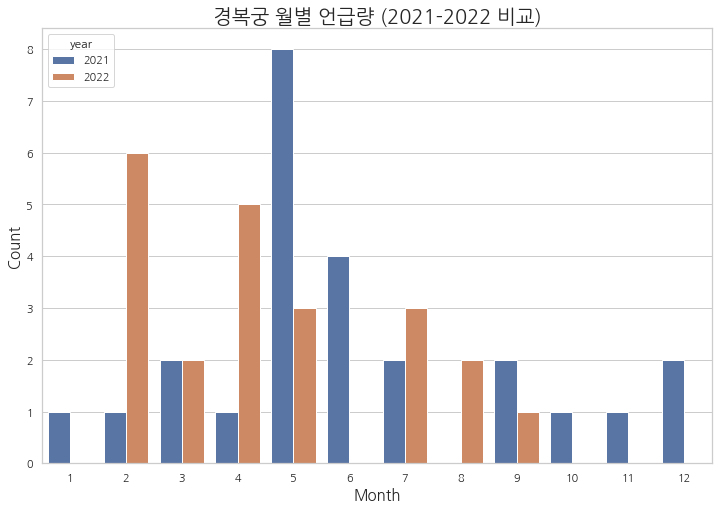

In [161]:
plt.figure(figsize=(12, 8))
plt.rc('font', family='NanumGothic')
plt.title('경복궁 월별 언급량 (2021-2022 비교)', fontsize=20)

sns.set_style('whitegrid')
sns.countplot(data=df_g, x='month', hue='year')

plt.xlabel('Month', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

### 북촌한옥마을

In [38]:
df_b = df_2[df_2['카카오위치명'] == '북촌한옥마을']
df_b.count()

content          28
place_final      28
place            28
place_content     2
대상여부             28
date             28
year             28
month            28
like             28
tags             28
카카오위치명           28
경도               28
위도               28
count            28
dtype: int64

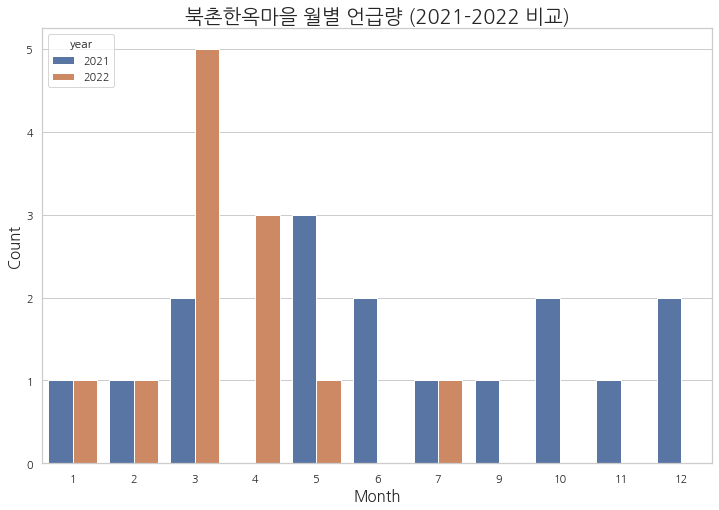

In [162]:
plt.figure(figsize=(12, 8))
plt.rc('font', family='NanumGothic')
plt.title('북촌한옥마을 월별 언급량 (2021-2022 비교)', fontsize=20)

sns.set_style('whitegrid')
sns.countplot(data=df_b, x='month', hue='year')

plt.xlabel('Month', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

### 감천문화마을

In [48]:
df_c = df_2[df_2['카카오위치명'] == '감천문화마을']
df_c.count()

content          19
place_final      19
place            17
place_content     4
대상여부             19
date             19
year             19
month            19
like             19
tags             19
카카오위치명           19
경도               19
위도               19
count            19
dtype: int64

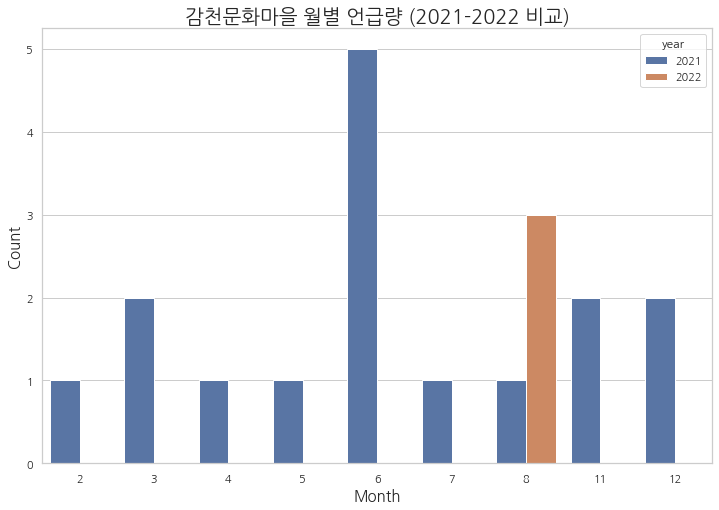

In [163]:
plt.figure(figsize=(12, 8))
plt.rc('font', family='NanumGothic')
plt.title('감천문화마을 월별 언급량 (2021-2022 비교)', fontsize=20)

sns.set_style('whitegrid')
sns.countplot(data=df_c, x='month', hue='year')

plt.xlabel('Month', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

### 상위 3개 합쳐서 분석

In [50]:
# 상위 3개 데이터 합치기
df_top3 = pd.concat([df_g, df_b, df_c], axis=0)
df_top3

,content,place_final,place,place_content,대상여부,date,year,month,like,tags,카카오위치명,경도,위도,count
0,by travelaashley Nighttime tours to one of Se...,Gyeongbokgung,Gyeongbokgung,NaN,2,2022-09-01,2022,9,0,"['#seoulbyme', '#jongno.??', '#korea_attractio...",경복궁,126.976897,37.577609,47
24,My Love for Ginko is endless #autumn #gyeongbo...,경복궁,경복궁,NaN,2,2021-11-04,2021,11,44,"['#autumn', '#gyeongbokgung', '#gyeongbokgungp...",경복궁,126.976897,37.577609,47
26,The traditional part of South Korea that you s...,경복궁,NaN,경복궁,2,2021-09-24,2021,9,259,"['#kbeauty', '#koreagram', '#korea', '#koreans...",경복궁,126.976897,37.577609,47
27,Gyeongbokgung PalaceWe found a little shop whe...,경복궁,서울,경복궁,2,2021-09-23,2021,9,72,"['#gyeongbokgungpalace', '#seoul', '#hanbok', ...",경복궁,126.976897,37.577609,47
28,Happy Monday Just your reminder to listen t...,경복궁,경복궁,NaN,2,2021-07-26,2021,7,0,[],경복궁,126.976897,37.577609,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,This place was a maze to explore It was fun ...,감천문화마을,감천문화마을,NaN,2,2022-08-10,2022,8,105,"['#korealife', '#korealandscape', '#koreatrip'...",감천문화마을,129.009428,35.096300,19
81,Any BTS fans This mural can be found in gamch...,감천문화마을,감천문화마을,NaN,2,2022-08-24,2022,8,0,"['#korealife', '#korealandscape', '#koreatrip'...",감천문화마을,129.009428,35.096300,19
85,Isn t Busan beautiful These scenarios can be ...,감천문화마을,NaN,감천문화마을,2,2021-12-06,2021,12,203,[],감천문화마을,129.009428,35.096300,19
86,Learn from the past Prepare for the future E...,감천문화마을,감천문화마을,NaN,2,2021-11-15,2021,11,97,[],감천문화마을,129.009428,35.096300,19


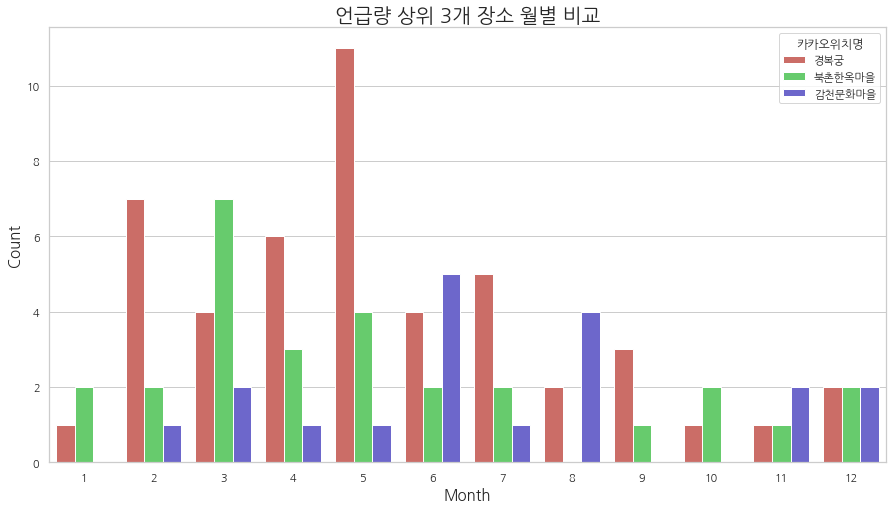

In [127]:
plt.figure(figsize=(15, 8))
plt.rc('font', family='NanumGothic')
plt.title('언급량 상위 3개 장소 월별 비교', fontsize=20)

sns.set_style('whitegrid')
sns.countplot(data=df_top3, x='month', hue='카카오위치명', palette='hls')

plt.xlabel('Month', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

## 행정구역별 언급량

In [63]:
df_sido = pd.read_csv('./data/koreagram_시도별_개수.csv', encoding='cp949')
df_sido

,시도,언급량
0,대구광역시,26
1,인천광역시,53
2,광주광역시,44
3,대전광역시,57
4,울산광역시,6
5,세종특별자치시,3
6,강원도,135
7,충청북도,42
8,충청남도,120
9,경상북도,107


In [94]:
df_sido = df_sido.sort_values(by=['언급량'], ascending=False)
df_sido = df_sido.reset_index(drop=True)
df_sido

,시도,언급량
0,서울특별시,1153
1,경기도,215
2,전라남도,169
3,제주특별자치도,145
4,전라북도,142
5,강원도,135
6,충청남도,120
7,경상남도,113
8,경상북도,107
9,부산광역시,61


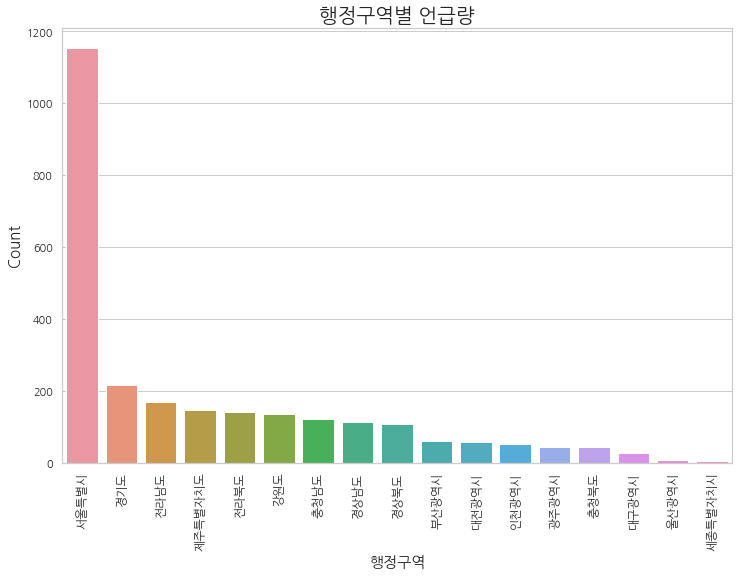

In [166]:
# bar
plt.figure(figsize=(12, 8))
plt.rc('font', family='NanumGothic')
plt.title('행정구역별 언급량', fontsize=20)

sns.barplot(data=df_sido, x='시도', y='언급량')

plt.xlabel('행정구역', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(fontsize=12, rotation=90)
plt.show()

In [116]:
# pie
sum = 26 + 6 + 3
df_sido_2 = df_sido.drop([14, 15, 16])
df_sido_2.loc[14] = ['기타', sum]
df_sido_2

,시도,언급량
0,서울특별시,1153
1,경기도,215
2,전라남도,169
3,제주특별자치도,145
4,전라북도,142
5,강원도,135
6,충청남도,120
7,경상남도,113
8,경상북도,107
9,부산광역시,61


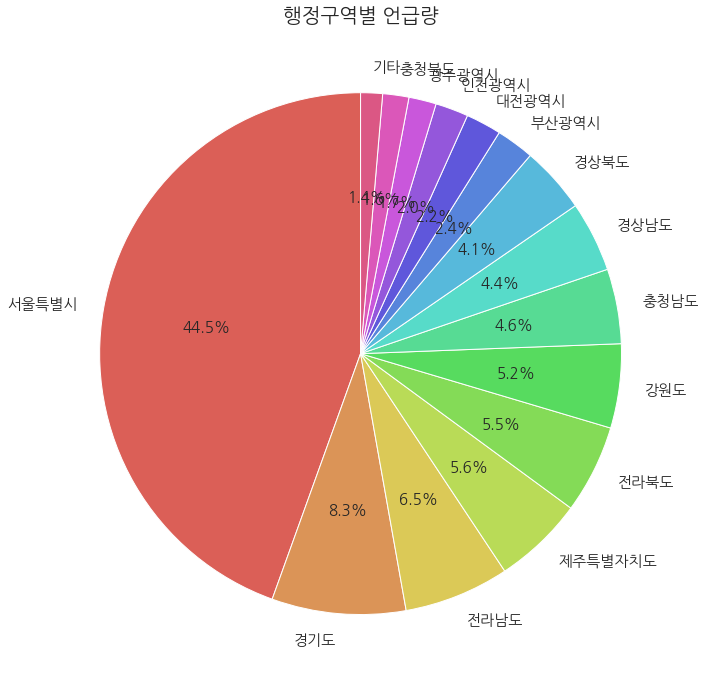

In [165]:
plt.figure(figsize=(15, 12))
plt.rc('font', family='NanumGothic')
plt.title('행정구역별 언급량', size=20)

colors = sns.color_palette('hls', len(df_sido_2['시도']))
plt.pie(df_sido_2['언급량'], labels=df_sido_2['시도'], startangle=90, autopct='%.1f%%', textprops={'fontsize':15}, colors=colors)

plt.show()